In [47]:
#Import Block
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("fivethirtyeight")

import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import Gaming as gaming
pd.set_option("precision", 2) #Rounding to 2 sig.figs

<h2>Mission Statement:</h2>
<br>
Going to be using the <a href = "https://www.investopedia.com/terms/1/52-week-range.asp" target = "_blank">52 week range</a> (from 4/21/23) to compare 5 popular video game development companies based off of <a href = "https://www.britannica.com/money/how-to-analyze-a-stock" target = "_blank">Fundamental Analysis Techniques </a>.

<br>
The five companies will be:
<li> Sony Entertainment
<li> Nintendo
<li> Electronic Arts
<li> Activision Blizaard
<li> Square Enix

 <br>
    
   <b>I want to answer by the end of this project</b>:
<li> Who has the highest/lowest growth over the year(based on USD)?
<li> Which stock is the safest / most dangerous to invest in?

        

<h3>Retreiving 52 week Stock Data from Yahoo Finance

In [2]:
#In USD
sony = pdr.DataReader(tickers = "SONY", start = "2022-04-21", end = "2023-04-21" )
ea = pdr.DataReader(tickers = "EA",start = "2022-04-21", end = "2023-04-21" )
blizzard = pdr.DataReader(tickers = "ATVI",start = "2022-04-21", end = "2023-04-21" )
nintendo = pdr.DataReader(tickers = "NTDOY", start = "2022-04-21", end = "2023-04-21" )
enix = pdr.DataReader(tickers = "SQNXF",start = "2022-04-21", end = "2023-04-21" )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<h3> Calculating Price to Earning Ratio of the High and Low Points

In [4]:
#Grabbing the high and low stock prices of each company
sony_high = sony["High"]
sony_low = sony["Low"]

ea_high = ea["High"]
ea_low = ea["Low"]

blizzard_high = blizzard["High"]
blizzard_low = blizzard["Low"]

nintendo_high = nintendo["High"]
nintendo_low = nintendo["Low"]

enix_high = enix["High"]
enix_low = enix["Low"]

In [21]:
#Converting each high and low stock to its respecitve price to earning ratio
sony_hpte = sony_high.apply(gaming.sony_pte).values.astype(np.float64)
sony_lpte = sony_low.apply(gaming.sony_pte).values.astype(np.float64)

ea_hpte = ea_high.apply(gaming.ea_pte).values.astype(np.float64)
ea_lpte = ea_low.apply(gaming.ea_pte).values.astype(np.float64)

blizzard_hpte = blizzard_high.apply(gaming.blizzard_pte).values.astype(np.float64)
blizzard_lpte = blizzard_low.apply(gaming.blizzard_pte).values.astype(np.float64)

nintendo_hpte = nintendo_high.apply(gaming.nintendo_pte).values.astype(np.float64)
nintendo_lpte = nintendo_low.apply(gaming.nintendo_pte).values.astype(np.float64)

enix_hpte = enix_high.apply(gaming.enix_pte).values.astype(np.float64)
enix_lpte = enix_low.apply(gaming.enix_pte).values.astype(np.float64)

In [41]:
#Adding these to a Dataframe in which our visualization / analysis shall be done on
fundamentals = pd.DataFrame()
fundamentals["Date"] = enix.index
fundamentals.set_index("Date", inplace = True)

fundamentals["Sony Price to Earning Ratio (High)"] = sony_hpte
fundamentals["Sony Price to Earning Ratio (Low)"] = sony_lpte

fundamentals["Electronic Arts Price to Earning Ratio (High)"] = ea_hpte
fundamentals["Electronic Arts Price to Earning Ratio (Low)"] = ea_lpte

fundamentals["Activision Blizzard Price to Earning Ratio (High)"] = blizzard_hpte
fundamentals["Activision Blizzard Price to Earning Ratio (Low)"] = blizzard_lpte

fundamentals["Nintendo Price to Earning Ratio (High)"] = nintendo_hpte
fundamentals["Nintendo Price to Earning Ratio (Low)"] = nintendo_lpte

fundamentals["Square Enix Price to Earning Ratio (High)"] = enix_hpte
fundamentals["Square Enix Price to Earning Ratio (Low)"] = enix_lpte

fundamentals

,Sony Price to Earning Ratio (High),Sony Price to Earning Ratio (Low),Electronic Arts Price to Earning Ratio (High),Electronic Arts Price to Earning Ratio (Low),Activision Blizzard Price to Earning Ratio (High),Activision Blizzard Price to Earning Ratio (Low),Nintendo Price to Earning Ratio (High),Nintendo Price to Earning Ratio (Low),Square Enix Price to Earning Ratio (High),Square Enix Price to Earning Ratio (Low)
Date,,,,,,,,,,
2022-04-21,14.50,14.03,45.54,44.72,41.20,40.98,14.05,13.67,44.56,44.56
2022-04-22,13.97,13.62,46.58,44.79,41.15,40.90,13.74,13.61,43.52,42.69
2022-04-25,13.96,13.68,46.62,45.35,40.87,40.32,13.75,13.25,43.52,43.52
2022-04-26,13.77,13.41,46.38,45.05,40.66,40.11,13.56,13.16,44.19,44.19
2022-04-27,13.73,13.38,45.14,43.84,40.25,39.61,13.32,13.14,44.54,44.54
...,...,...,...,...,...,...,...,...,...,...
2023-04-14,14.56,14.40,46.57,46.17,44.60,44.30,11.61,11.30,52.61,52.61
2023-04-17,14.53,14.39,46.53,46.06,44.55,44.07,11.32,11.21,52.39,52.39
2023-04-18,14.63,14.49,46.88,46.31,44.72,44.44,11.54,11.42,52.78,52.78


<h2>Visualization of Price to Earning Ratio for Each Company

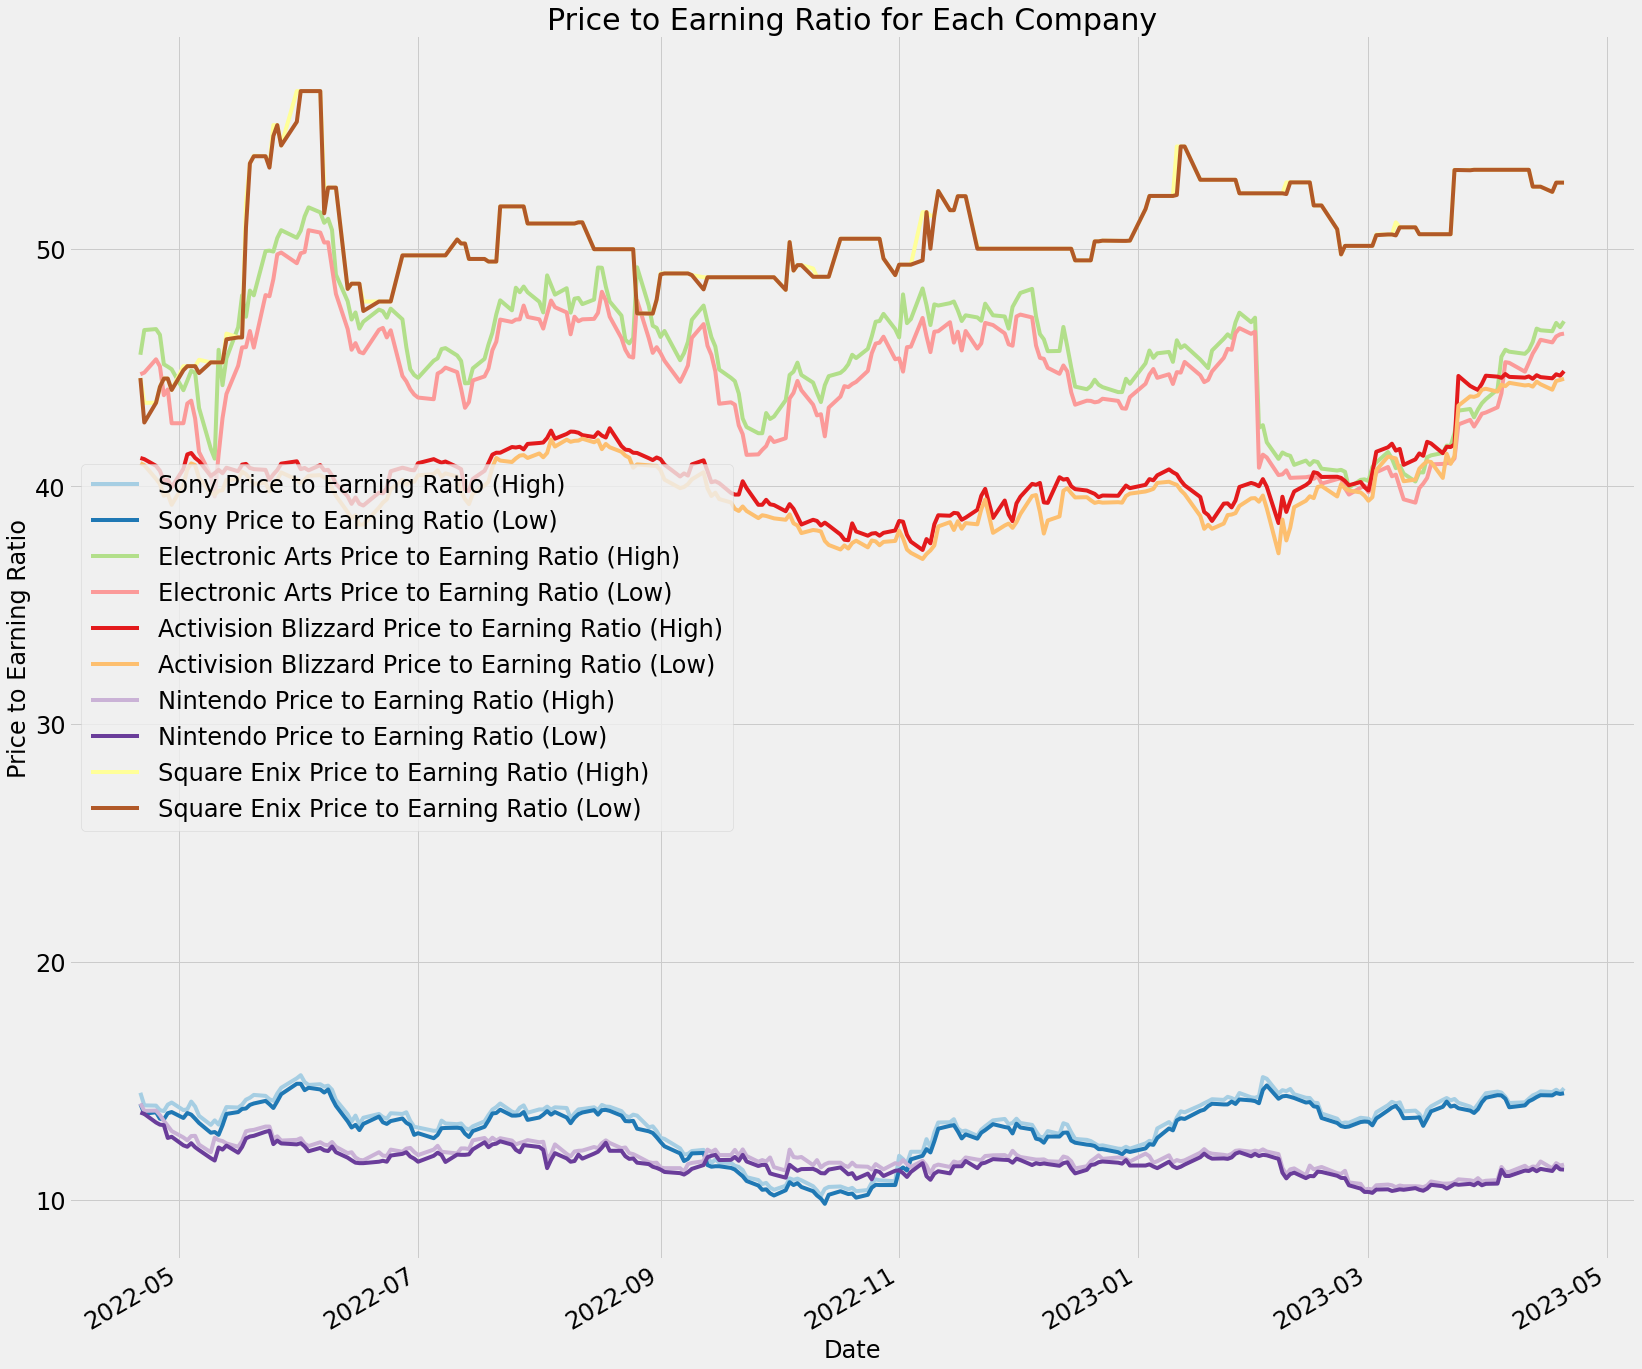

In [98]:
fundamentals.plot(figsize = (25,25),
                  colormap = "Paired",
                  fontsize = 24)
plt.legend(fontsize = 24, loc = "best")
plt.title("Price to Earning Ratio for Each Company", fontsize = 30)
plt.xlabel('Date', fontsize= 24)
plt.ylabel('Price to Earning Ratio', fontsize= 24)
plt.show()

The average Price to Earning typically is from 20 to 25, having a low price to earning ratio means you are paying less per 1$ of earning the company makes. This ratio dosen't mean much by itself so comparing it to other companies in the same industry gives it value.
<br>

From the Figure above, we can see that in order from lowest to highest Price to Earning ratio are the companies: Nintendo(1st), Sony(2nd), Activision Blizzard(3rd), Electronic Arts(4th) and Square Enix(5th).
<br>
<h3> Best / Worst Investment?</h3>

Going back to my question of which company is the best to invest in based on the Price to Earning ratio and the stability of the stock over the 52 week period, I can confidantly say that Nintendo is the safest stock of the five video game companies to invest in. In turn. I can say that the most dangerous to invest in would be Square Enix given its high Price to Earning ratio being the worst deal out of the five companies. Next to Square Enix would be Electronic Arts though it is possible it could dip below Activision Blizzard Price to Earning within the coming months. 
<br>

<h3> Best / Worst Growth? </h3>

When looking at which Stock had the best growth over its 52 week period, Nintendo takes the crown again being the only stock with a noticeable dip in its Price to Earning ratio overall. The worst growth or biggest fall in stock attractiveness was Square Enix stock as it had the biggest increase in its Price to Earning Ratio over its 52 week period making the stock less cost effective for investors generally.